In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
data=pd.read_csv('C:/Users/waiti/쥬피터/train.csv',parse_dates=['Dates'])
data['Year']=data['Dates'].dt.year
data['Month']=data['Dates'].dt.month
data['Hour']=data['Dates'].dt.hour
data['Minute']=data['Dates'].dt.minute

Dates에서 Year, Month, Hour, Minute를 뽑아서 변수로 추가 생성

In [3]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Hour,Minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,23,30


In [4]:
#데이터 기본 정보
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878049 entries, 0 to 878048
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       878049 non-null  datetime64[ns]
 1   Category    878049 non-null  object        
 2   Descript    878049 non-null  object        
 3   DayOfWeek   878049 non-null  object        
 4   PdDistrict  878049 non-null  object        
 5   Resolution  878049 non-null  object        
 6   Address     878049 non-null  object        
 7   X           878049 non-null  float64       
 8   Y           878049 non-null  float64       
 9   Year        878049 non-null  int64         
 10  Month       878049 non-null  int64         
 11  Hour        878049 non-null  int64         
 12  Minute      878049 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 87.1+ MB


- datetime : 1
- Category : 6
- float : 2
- int : 4

In [4]:
#Shape
print('The shape of data is:',data.shape)

The shape of data is: (878049, 13)


In [5]:
#null값이 있는 컬럼 추출
data.columns[data.isnull().any()]

Index([], dtype='object')

결측치는 없다.

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba7e3d5dc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba7b6afe08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba7e3c7ec8>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba7ea5ce48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba7ea57fc8>],
 'means': []}

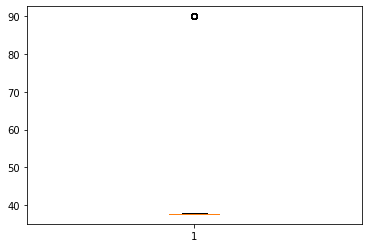

In [6]:
#outlier
plt.boxplot(data['Y'])

위도가 90도로 찍힌 이상치 발견

In [7]:
data[data['Y'] > 50 ].count()

Dates         67
Category      67
Descript      67
DayOfWeek     67
PdDistrict    67
Resolution    67
Address       67
X             67
Y             67
Year          67
Month         67
Hour          67
Minute        67
dtype: int64

이상치의 개수 확인

In [3]:
data = data[data['Y'] < 50]
data.shape

(877982, 13)

67개의 이상치를 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x1ba7840b3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x1ba7cc2cc48>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ba7cc2fb08>],
 'medians': [<matplotlib.lines.Line2D at 0x1ba7cc26bc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ba7cc1fa08>],
 'means': []}

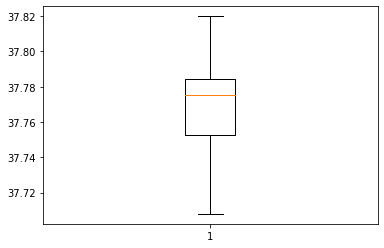

In [9]:
plt.boxplot(data["Y"])

이상치가 제거된 위도에 대한 boxplot

In [10]:
data.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Year,Month,Hour,Minute
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23,53
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599,2015,5,23,53
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015,5,23,33
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873,2015,5,23,30
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541,2015,5,23,30


In [12]:
data.shape

(877982, 13)

# Feature Engine

In [11]:
data['Address'].value_counts()

800 Block of BRYANT ST              26533
800 Block of MARKET ST               6581
2000 Block of MISSION ST             5097
1000 Block of POTRERO AV             4063
900 Block of MARKET ST               3251
                                    ...  
VELASCO AV / RIO VERDE ST               1
BRUSSELS ST / WILDE AV                  1
ANKENY ST / MILL ST                     1
SANBENITO WY / SAINT FRANCIS BL         1
TWINPEAKS BL / MOUNTAINSPRING AV        1
Name: Address, Length: 23191, dtype: int64

'Block'이라는 단어를 찾을 수 있는데, Address를 get_dummies()를 사용하면 변수가 너무 많아져서 모델을 만드는데 시간이 오래걸림

따라서, Block이 있으면 1, 없으면 0으로 바꾸려고함

In [4]:
data['Block'] = data['Address'].str.contains('block', case=False)
data['Block'] = data['Block'].map(lambda x: 1 if  x == True else 0)

In [5]:
data['Solution'] = data['Resolution'].str.contains('NONE', case= False)
data['Solution'] = data['Solution'].map(lambda x: 0 if  x == True else 1)

In [6]:
data= data.drop(["Descript", "Resolution",'Dates','Address'], axis = 1)
# data = data.sample(n = 100000,random_state = 0) #샘플링
# data.shape
data.head()

,Category,DayOfWeek,PdDistrict,X,Y,Year,Month,Hour,Minute,Block,Solution
0,WARRANTS,Wednesday,NORTHERN,-122.425892,37.774599,2015,5,23,53,0,1
1,OTHER OFFENSES,Wednesday,NORTHERN,-122.425892,37.774599,2015,5,23,53,0,1
2,OTHER OFFENSES,Wednesday,NORTHERN,-122.424363,37.800414,2015,5,23,33,0,1
3,LARCENY/THEFT,Wednesday,NORTHERN,-122.426995,37.800873,2015,5,23,30,1,0
4,LARCENY/THEFT,Wednesday,PARK,-122.438738,37.771541,2015,5,23,30,1,0


In [7]:
X = data[['DayOfWeek','PdDistrict','X','Y','Year','Month','Hour','Minute','Block','Solution']]
y = data[['Category']]

In [8]:
X_dummies = pd.get_dummies(X,columns=['DayOfWeek', 'PdDistrict'])

명목형 변수에 대해서 0과 1로 바꿔줌(one_hot_encoding)

In [27]:
X_dummies.head()
X_dummies.columns

Index(['X', 'Y', 'Year', 'Month', 'Hour', 'Minute', 'Block', 'Solution',
       'DayOfWeek_Friday', 'DayOfWeek_Monday', 'DayOfWeek_Saturday',
       'DayOfWeek_Sunday', 'DayOfWeek_Thursday', 'DayOfWeek_Tuesday',
       'DayOfWeek_Wednesday', 'PdDistrict_BAYVIEW', 'PdDistrict_CENTRAL',
       'PdDistrict_INGLESIDE', 'PdDistrict_MISSION', 'PdDistrict_NORTHERN',
       'PdDistrict_PARK', 'PdDistrict_RICHMOND', 'PdDistrict_SOUTHERN',
       'PdDistrict_TARAVAL', 'PdDistrict_TENDERLOIN'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y,random_state=0)

In [11]:
y_train = y_train.iloc[:,0]
y_test = y_test.iloc[:,0].values

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(X_train)

In [13]:
#데이터변환
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
#이상치가 존재하지 않으므로 MinMaxScaler로 0,1사이에 값으로 조정했다.
X_train_scaled

array([[0.74693575, 0.76724447, 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.55283925, 0.28226468, 0.75      , ..., 0.        , 0.        ,
        0.        ],
       [0.73486576, 0.50078256, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.68625308, 0.67061816, 0.83333333, ..., 0.        , 0.        ,
        1.        ],
       [0.71549904, 0.70194662, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.85541684, 0.10084549, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

# MLP

## MLP default

In [19]:
mlp = MLPClassifier(random_state=0).fit(X_train, y_train)
print("Train Accuracy : {:.3f}".format(mlp.score(X_train,y_train)))
print("Test Accuracy : {:.3f}".format(mlp.score(X_test,y_test)))

Train Accuracy : 0.294
Test Accuracy : 0.293


In [24]:
mlp = MLPClassifier(random_state=0).fit(X_train_scaled, y_train)
print("Train Accuracy : {:.3f}".format(mlp.score(X_train_scaled,y_train)))
print("Test Accuracy : {:.3f}".format(mlp.score(X_test_scaled,y_test)))

C:\Users\waiti\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Train Accuracy : 0.323
Test Accuracy : 0.321


## Grid Search

In [14]:
pipe = Pipeline([("classifier", MLPClassifier())])

In [15]:
param_grid = [{'classifier': [MLPClassifier(random_state=0)],
    'classifier__alpha':[0.0001,0.001,0.01,0.01,0.1,1,10],
    'classifier__hidden_layer_sizes': [(200,),(100,),(50,)],
    'classifier__max_iter': [1000,500],
    'classifier__activation':['relu','tanh']}]

In [16]:
grid = GridSearchCV(pipe, param_grid, cv=5,n_jobs = -1)
grid.fit(X_train_scaled, y_train)

print("최적의 매개변수:\n{}\n".format(grid.best_params_))
print("최상의 교차 검증 점수: {:.2f}".format(grid.best_score_))
print("테스트 세트 점수: {:.2f}".format(grid.score(X_test, y_test)))

C:\Users\waiti\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


최적의 매개변수:
{'classifier': MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False), 'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (200,), 'classifier__max_iter': 500}

최상의 교차 검증 점수: 0.32
테스트 세트 점수: 0.03


In [17]:
print("테스트 세트 점수: {:.2f}".format(grid.score(X_test_scaled, y_test)))

테스트 세트 점수: 0.33


## MLP 

In [16]:
mlp_grid = MLPClassifier(activation='relu', alpha=0.0001,
                    hidden_layer_sizes=(200,),max_iter=500,batch_size= 256,random_state=0).fit(X_train_scaled,y_train)

In [17]:
print("Train Accuracy : {:.3f}".format(mlp_grid.score(X_train_scaled, y_train)))
print("Test Accuracy: {:.3f}".format(mlp_grid.score(X_test_scaled, y_test)))

Train Accuracy : 0.329
Test Accuracy: 0.326


## MLP classification_report

In [29]:
from sklearn.metrics import classification_report
mlp_pred = mlp_grid.predict(X_test_scaled)
print (classification_report(y_test,mlp_pred))

C:\Users\waiti\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                             precision    recall  f1-score   support

                      ARSON       0.50      0.00      0.01       380
                    ASSAULT       0.19      0.20      0.19     19183
                 BAD CHECKS       0.00      0.00      0.00       100
                    BRIBERY       0.00      0.00      0.00        63
                   BURGLARY       0.20      0.04      0.07      9109
         DISORDERLY CONDUCT       0.24      0.04      0.07      1038
DRIVING UNDER THE INFLUENCE       0.00      0.00      0.00       593
              DRUG/NARCOTIC       0.37      0.36      0.37     13506
                DRUNKENNESS       0.00      0.00      0.00      1105
               EMBEZZLEMENT       0.00      0.00      0.00       295
                  EXTORTION       0.00      0.00      0.00        55
            FAMILY OFFENSES       0.00      0.00      0.00       115
     FORGERY/COUNTERFEITING       0.18      0.02      0.04      2648
                      FRAUD      

In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mlp_grid, X_train_scaled, np.ravel(y_train), cv = 5, scoring='accuracy')
cross_val_score_accuracy=scores.mean()
cross_val_score_accuracy

C:\Users\waiti\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


0.3251625713857097

In [20]:
import matplotlib.pyplot as plt

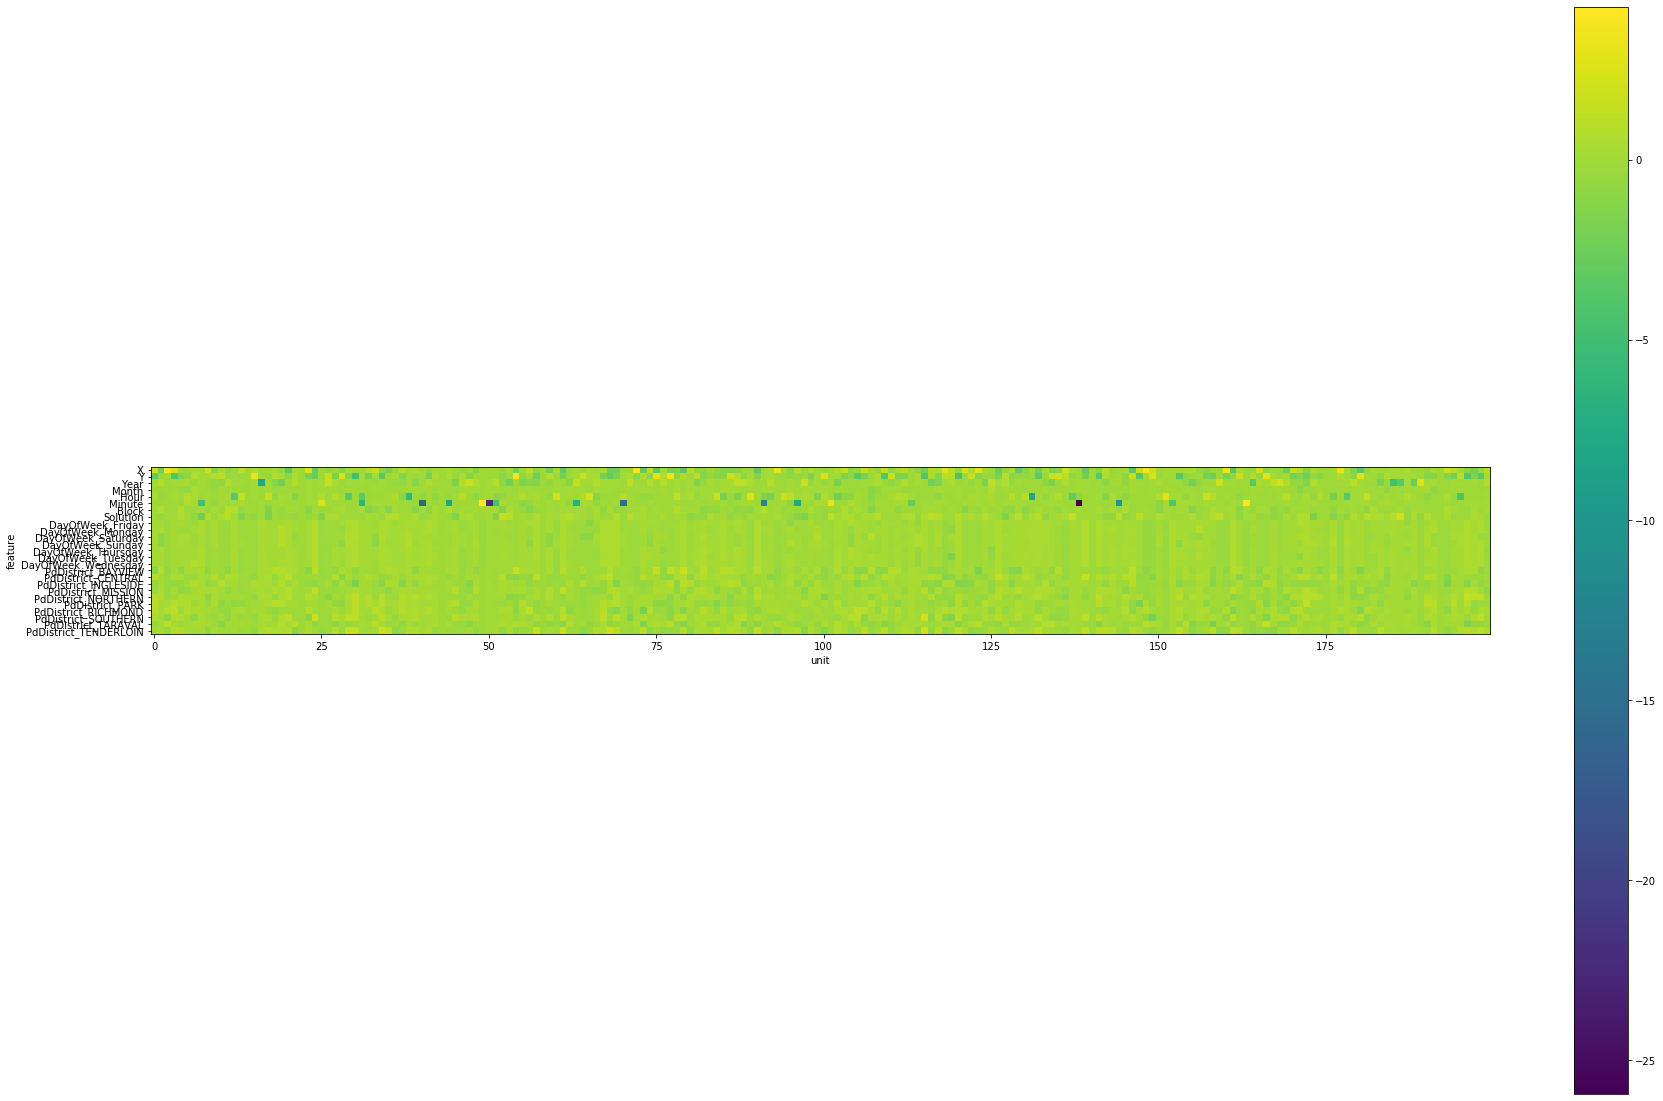

In [32]:
plt.figure(figsize = (30,20))
plt.imshow(mlp_grid.coefs_[0], interpolation = 'none', cmap = 'viridis')
plt.yticks(range(25), X_train.columns)
plt.xlabel("unit")
plt.ylabel("feature")
plt.colorbar()
plt.show()

In [23]:
mlp_grid.coefs_[0]

array([[ 1.96228792e+00, -2.16790277e+00,  3.58733158e+00, ...,
        -1.98085312e+00, -3.92607216e-01,  7.17006965e-01],
       [-2.99722256e+00, -4.14050527e-01,  1.60390892e-01, ...,
        -1.71146871e+00, -3.41660323e+00,  3.08776661e-01],
       [ 1.15859482e-02,  1.04153689e+00, -7.77230606e-04, ...,
         1.52639451e-02, -1.59120296e-02,  9.85389435e-01],
       ...,
       [ 5.52083216e-01,  3.63958622e-02, -9.65449798e-01, ...,
         6.28159881e-01,  1.21676575e+00,  9.66643833e-02],
       [-3.39685904e-01,  5.06387081e-02,  1.41951503e+00, ...,
        -6.78295461e-01, -6.04939543e-01, -1.54686487e-02],
       [ 1.86981533e-01,  3.91370735e-01, -4.21722959e-01, ...,
         6.33841604e-01,  1.29247189e+00,  5.76642969e-01]])